# Exploring the Relationship Between Weather Patterns and Energy Consumption in Smart Homes: A Regression Analysis

In [1]:
# Import all libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # ploting the data
import seaborn as sns # ploting the data


In [2]:
#Importing the dataset

In [3]:
#load the datasets
df = pd.read_csv(r"Data1.csv")
df

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,...,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast
0,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,...,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17,6436,26118
1,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,...,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16,5856,24934
2,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,...,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8,5454,23515
3,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,...,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2,5151,22642
4,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,...,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9,4861,21785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,282.140,281.150,283.150,1028,71,3,300,0.0,0.0,0.0,...,6073.0,63.0,95.0,85.0,277.0,0.0,3113.0,96,3253,30619
35060,282.150,282.150,282.150,1029,87,2,310,0.3,0.0,0.0,...,6074.0,62.0,95.0,33.0,280.0,0.0,3288.0,51,3353,29932
35061,284.150,284.150,284.150,1028,76,1,290,0.0,0.0,0.0,...,6076.0,61.0,94.0,31.0,286.0,0.0,3503.0,36,3404,27903
35062,285.660,285.150,286.150,1028,76,1,0,0.0,0.0,0.0,...,6075.0,61.0,93.0,31.0,287.0,0.0,3586.0,29,3273,25450


In [4]:
df.isnull().sum()

temp                                           0
temp_min                                       0
temp_max                                       0
pressure                                       0
humidity                                       0
wind_speed                                     0
wind_deg                                       0
rain_1h                                        0
rain_3h                                        0
snow_3h                                        0
clouds_all                                     0
weather_id                                     0
generation hydro run-of-river and poundage    19
generation hydro water reservoir              18
generation marine                             19
generation nuclear                            17
generation other                              18
generation other renewable                    18
generation solar                              18
generation waste                              19
generation wind offs

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

temp                                          0
temp_min                                      0
temp_max                                      0
pressure                                      0
humidity                                      0
wind_speed                                    0
wind_deg                                      0
rain_1h                                       0
rain_3h                                       0
snow_3h                                       0
clouds_all                                    0
weather_id                                    0
generation hydro run-of-river and poundage    0
generation hydro water reservoir              0
generation marine                             0
generation nuclear                            0
generation other                              0
generation other renewable                    0
generation solar                              0
generation waste                              0
generation wind offshore                

In [6]:
df

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,...,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast
0,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,...,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17,6436,26118
1,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,...,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16,5856,24934
2,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,...,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8,5454,23515
3,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,...,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2,5151,22642
4,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,...,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9,4861,21785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,282.140,281.150,283.150,1028,71,3,300,0.0,0.0,0.0,...,6073.0,63.0,95.0,85.0,277.0,0.0,3113.0,96,3253,30619
35060,282.150,282.150,282.150,1029,87,2,310,0.3,0.0,0.0,...,6074.0,62.0,95.0,33.0,280.0,0.0,3288.0,51,3353,29932
35061,284.150,284.150,284.150,1028,76,1,290,0.0,0.0,0.0,...,6076.0,61.0,94.0,31.0,286.0,0.0,3503.0,36,3404,27903
35062,285.660,285.150,286.150,1028,76,1,0,0.0,0.0,0.0,...,6075.0,61.0,93.0,31.0,287.0,0.0,3586.0,29,3273,25450


In [7]:
df.head()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,...,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast
0,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,...,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17,6436,26118
1,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,...,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16,5856,24934
2,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,...,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8,5454,23515
3,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,...,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2,5151,22642
4,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,...,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9,4861,21785


In [8]:
df.describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,...,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast
count,35043.000000,35043.000000,35043.000000,35043.000000,35043.000000,35043.000000,35043.000000,35043.000000,35043.000000,35043.000000,...,35043.000000,35043.000000,35043.000000,35043.000000,35043.000000,35043.0,35043.000000,35043.000000,35043.000000,35043.000000
mean,290.801475,290.243385,291.375494,1015.947065,65.128956,2.695831,160.628143,0.036011,0.000227,0.000154,...,6263.933767,60.229061,85.639871,1432.781982,269.450675,0.0,5464.509973,1438.907885,5470.705134,28711.536997
std,7.223386,7.079029,7.513035,11.923283,19.683975,2.584494,120.458199,0.268330,0.003536,0.011916,...,839.646581,20.239178,14.077767,1680.144908,50.196588,0.0,3213.730442,1677.690085,3176.415268,4592.527625
min,268.830656,268.830656,268.830656,969.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,237.000000,18105.000000
25%,285.150000,285.150000,285.743000,1012.000000,51.000000,1.000000,50.000000,0.000000,0.000000,0.000000,...,5760.500000,53.000000,73.000000,71.000000,240.000000,0.0,2933.000000,69.000000,2979.000000,24795.000000
50%,290.220000,290.150000,291.150000,1017.000000,67.000000,2.000000,130.000000,0.000000,0.000000,0.000000,...,6566.000000,57.000000,88.000000,616.000000,279.000000,0.0,4849.000000,576.000000,4853.000000,28906.000000
75%,296.150000,295.370000,297.150000,1021.000000,82.000000,4.000000,280.000000,0.000000,0.000000,0.000000,...,7025.000000,80.000000,97.000000,2578.000000,310.000000,0.0,7398.000000,2635.000000,7350.500000,32263.000000
max,311.150000,311.150000,314.820000,1087.000000,100.000000,133.000000,360.000000,12.000000,0.100000,1.125000,...,7117.000000,106.000000,119.000000,5792.000000,357.000000,0.0,17436.000000,5836.000000,17430.000000,41390.000000


In [9]:
df_d['total load forecast'].plot(kind="hist",figsize=(20, 7))
plt.show()

NameError: name 'df_d' is not defined

# Correlation

In [10]:
corr_matrix = df_d.corr(method='pearson')
matrix=corr_matrix["total load forecast"].sort_values(ascending=False)
print((matrix))

NameError: name 'df_d' is not defined

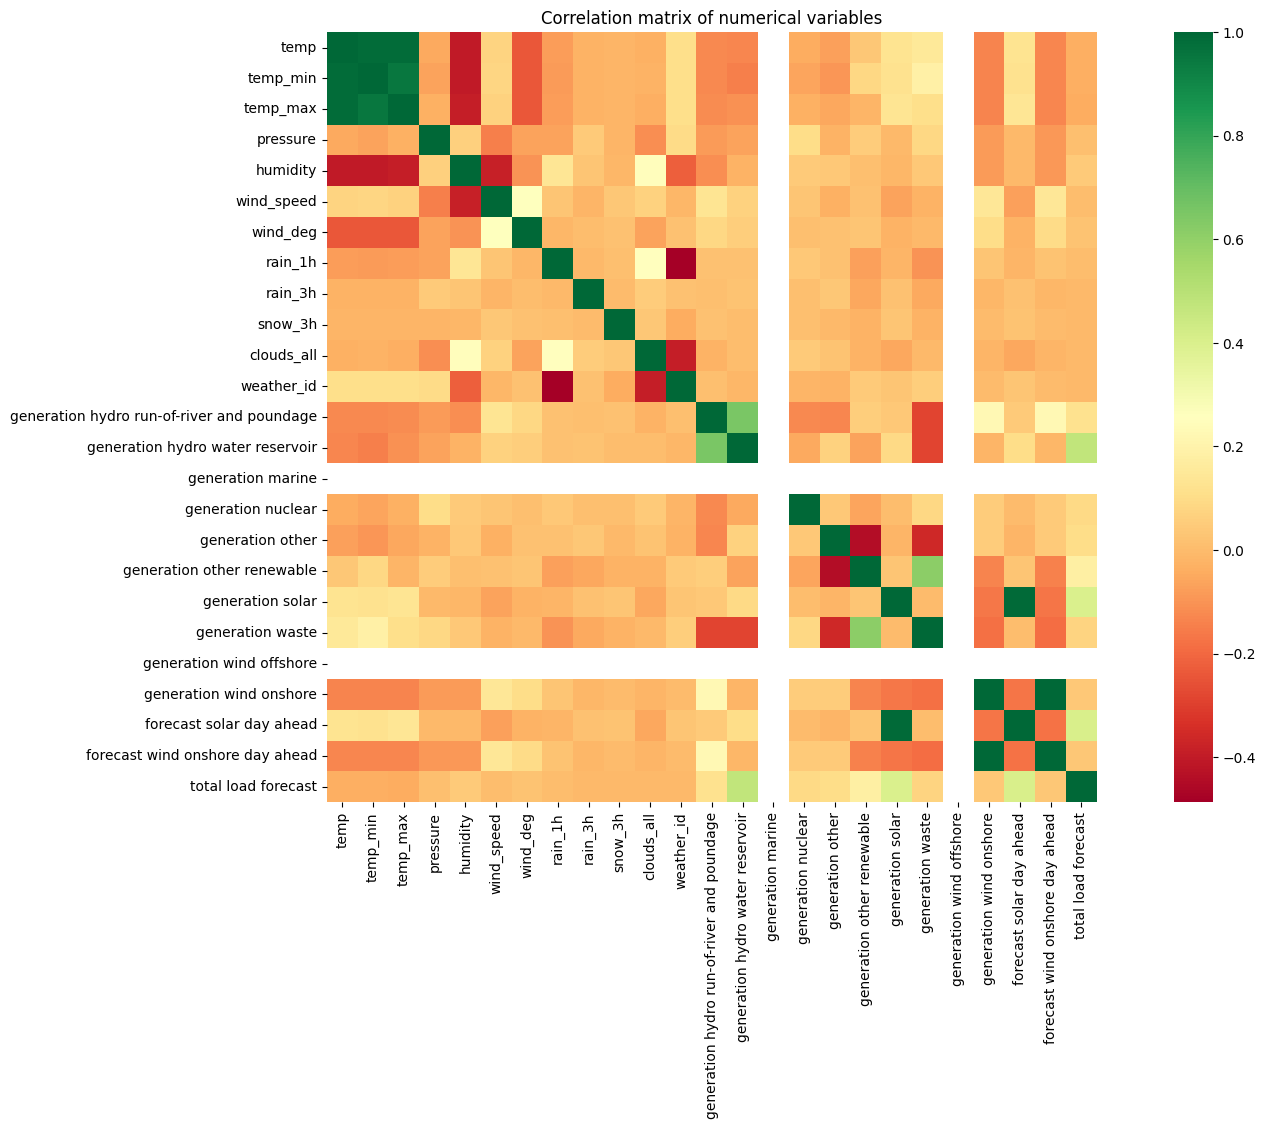

In [11]:
plt.figure(figsize=(20,10))
title = 'Correlation matrix of numerical variables'
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.title(title)
plt.ioff()